# 1. DATA CLEANING:
- Drop columns : Check for high colinearity
- Change data type : using get_dummies

In [2]:
#import libraries:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%store -r dmd

In [4]:
dmd.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


## Drop columns

In [5]:
# On the first approach to cleaning the data, we will check for colinearity and see wich columns can be dropped

### Firstly to see wich columns we would like to drop we check for colinearity:

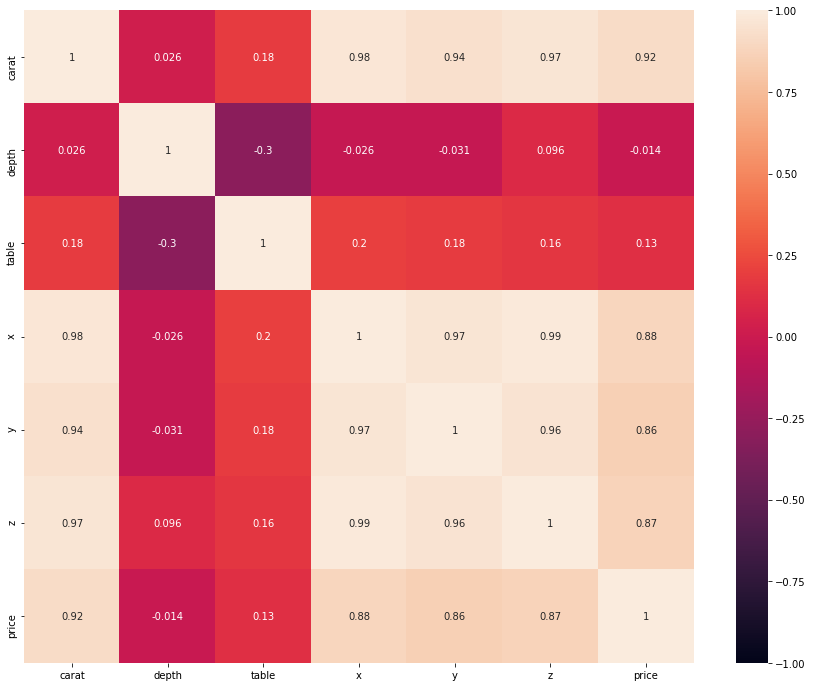

In [6]:
plt.figure(figsize=(15, 12))

#sns.heatmap(websites.corr()); #This is the heatmap withput numbers
heatmap = sns.heatmap(dmd.corr(), vmin=-1, vmax=1, annot=True)

In [7]:
#We are going to check columns whith high correlation
high_corr = dmd.corr() > 0.90
high_corr

,carat,depth,table,x,y,z,price
carat,True,False,False,True,True,True,True
depth,False,True,False,False,False,False,False
table,False,False,True,False,False,False,False
x,True,False,False,True,True,True,False
y,True,False,False,True,True,True,False
z,True,False,False,True,True,True,False
price,True,False,False,False,False,False,True


### Remove columns with high colienarity

In [8]:
drop1_hc = dmd.drop(columns=['x'])
drop1_hc.corr() >0.90

,carat,depth,table,y,z,price
carat,True,False,False,True,True,True
depth,False,True,False,False,False,False
table,False,False,True,False,False,False
y,True,False,False,True,True,False
z,True,False,False,True,True,False
price,True,False,False,False,False,True


In [9]:
drop2_hc = drop1_hc.drop(columns=['y'])
drop2_hc.corr() >0.90

,carat,depth,table,z,price
carat,True,False,False,True,True
depth,False,True,False,False,False
table,False,False,True,False,False
z,True,False,False,True,False
price,True,False,False,False,True


In [10]:
drop3_hc = drop2_hc.drop(columns=['z'])
drop3_hc.corr() >0.90

,carat,depth,table,price
carat,True,False,False,True
depth,False,True,False,False
table,False,False,True,False
price,True,False,False,True


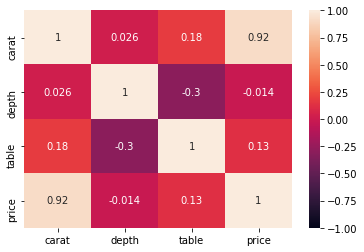

In [11]:
#Lets visualize the data again:
heatmap2 = sns.heatmap(drop3_hc.corr(), vmin=-1, vmax=1, annot=True)

In [12]:
#We see the output is all good now, following what we've done above lets drop these columns (x,y,z) of our df

In [13]:
dmd_cl1 = dmd.drop(columns = ['x','y','z'])

In [14]:
dmd_cl1.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
dtype: object

## Data type

In [15]:
#Value that are objcts have to be transformed to values that can be used with linear regression
#We create the dummies for the columns we want the type to change
dmd_cl1_dummy = pd.get_dummies(dmd_cl1[['cut','color','clarity']], drop_first=True)
dmd_cl1_dummy.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [16]:
dmd_cl1 = dmd_cl1.drop(columns = ['cut','color','clarity'])

In [17]:
#I now join the dummies to the rest of the table
dmd_cl1=dmd_cl1.join(dmd_cl1_dummy)
dmd_cl1.head()

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,0.50,62.3,55.0,1845,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.54,63.6,60.0,10164,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.32,61.7,60.0,5513,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1.20,62.1,55.0,5174,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,1.73,61.2,60.0,10957,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [18]:
dmd_cl1.dtypes

carat            float64
depth            float64
table            float64
price              int64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object

In [19]:
dmd_cl1.shape

(40455, 21)

In [20]:
%store dmd_cl1

Stored 'dmd_cl1' (DataFrame)
